# Improving performance of KNN

K-Means Clustering on the data set, and then use the cluster centroids  as instances for the KNN, depending on the data you may significantly decrease the number of comparisons that need to be done and thus increase the speed of the algorithm.

In [6]:
import math
import pandas as pd
import numpy as np
import random
import operator
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# train-validate Split

In [7]:
def train_validate_split(df,test_size):
    if isinstance(test_size,float):
        test_size = round(test_size*len(df))
        
    indices=df.index.tolist()
    validate_indices = random.sample(population=indices,k=test_size)
    
    validate_df=df.loc[validate_indices]
    train_df=df.drop(validate_indices)
    return train_df,validate_df

# calculation distances

In [8]:
def distances(train,test,typo):
    if typo==0:
        distance=0
        for i in range(len(train)-1):
            distance=distance+pow((train[i]-test[i]),2)
            distance=math.sqrt(distance)
        return distance
    elif typo==1:
        distance=0
        for i in range(len(train)-1):
            distance=distance+abs(train[i]-test[i])
        return distance
    elif typo==2:
        distance=0
        for i in range(len(train)-1):
            distance=distance+pow((train[i]-test[i]),3)
            distance=pow((distance),1/3)
            distance=abs(distance)
        return distance

In [9]:
def find_min_k(training_data,test_sample,k,typo):
#     print(training_data[0],test_sample,k)
    all_dist=dict()
    for x in range(len(training_data)):
#         print(x)
        all_dist[x]=(distances(training_data[x],test_sample,typo)) 
    
    lists=(sorted(all_dist.items(), key = lambda kv:(kv[1], kv[0])))
    k_least=[]
    for i in range(k):
        k_least.append(lists[i])
    return k_least

In [10]:
def checking(training_data,validation_data,k,typo):
    k_least=find_min_k(training_data,validation_data,k,typo)
#     print(k_least)
    uniq=np.unique(training_data[:,-1])
    uniq.sort()
    types=[]
    for i in range(len(uniq)):
        types.append(0)
    for x in k_least:
        for i in range(len(uniq)):
            if training_data[x[0],-1]==uniq[i]:
                types[i]+=1
            
    indx=types.index(max(types))
    predicted=uniq[indx]
    return predicted
#     print(k_least)

# Main ( )

In [11]:
def iris(test_file,typo):
    df=pd.read_csv("Iris.csv")
    data=df.values
    random.seed(0)
    training_df,validation_df=train_validate_split(df,.2)
    training_data=training_df.values
    validation_data=validation_df.values
    #prediction
    xis=[]
    for i in range(40):
        xis.append(i+1)
    yis=[]
    for p in range(40):
        true=0
        for i in validation_data:
            predicted=checking(training_data,i,p+1,typo)
            if predicted==i[-1]:
                true+=1
        total=len(validation_data)
        accuracy=true/total
        yis.append(accuracy)

#     print(len(yis))
    
    y = yis
    x = xis
    plt.plot(x, y,c="red")
    plt.xlabel("accuracy")
    plt.ylabel("K")
    plt.title('Iris')
    plt.show()

In [12]:
def robo1(test_file,typo):
    df=pd.read_csv("Robot1",delimiter=" ")
    new_arr=df.values
    random.seed(0)
    training_df,validation_df=train_validate_split(df,.2)
    training_data=training_df.values
    validation_data=validation_df.values
    training_data=training_data[:,1:len(training_data[0])]
    validation_data=validation_data[:,1:len(validation_data[0])]
    training_data[:,[-1,0]] = training_data[:,[0,-1]]
    validation_data[:,[-1,0]] = validation_data[:,[0,-1]]
    training_data=training_data[:,2:len(training_data[0])]
    validation_data=validation_data[:,2:len(validation_data[0])]
    # print(validation_data)
    xis=[]
    for i in range(40):
        xis.append(i+1)
    yis=[]
    
    for x in range(40):
        tp=0
        tn=0
        fp=0
        fn=0
        for i in validation_data:
            predicted=checking(training_data,i,x+1,typo)
            if predicted==i[-1]:
                if i[-1]==0:
                    tp+=1
                else:
                    tn+=1
            else:
                if i[-1]==1:
                    fp+=1
                else:
                    fn+=1
        
        
        accuracy=(tp+tn)/(tp+tn+fn+fp)
#         if tp!=0:
#             precision=tp/(tp+fp)
#             recall=tp/(tp+fn)
#             f1_score=2*(recall * precision) / (recall + precision)

#         else:
#             precision=0
#             recall=0
#             f1_score=0
        
        yis.append(accuracy)
  
    y = yis
    x = xis
    plt.plot(x, y,c="blue")
    plt.xlabel("accuracy")
    plt.ylabel("K")
    plt.title('Robot 1')
    plt.show()

In [13]:
def robo2(test_file,typo):
    df=pd.read_csv("Robot2",delimiter=" ")
    new_arr=df.values
    random.seed(0)
    training_df,validation_df=train_validate_split(df,.2)
    training_data=training_df.values
    validation_data=validation_df.values
    training_data=training_data[:,1:len(training_data[0])]
    validation_data=validation_data[:,1:len(validation_data[0])]
    training_data[:,[-1,0]] = training_data[:,[0,-1]]
    validation_data[:,[-1,0]] = validation_data[:,[0,-1]]
    training_data=training_data[:,2:len(training_data[0])]
    validation_data=validation_data[:,2:len(validation_data[0])]
    # print(validation_data)
    xis=[]
    for i in range(40):
        xis.append(i+1)
    yis=[]
    
    for x in range(40):
        tp=0
        tn=0
        fp=0
        fn=0
        for i in validation_data:
            predicted=checking(training_data,i,x+1,typo)
            if predicted==i[-1]:
                if i[-1]==0:
                    tp+=1
                else:
                    tn+=1
            else:
                if i[-1]==1:
                    fp+=1
                else:
                    fn+=1
        
        
        accuracy=(tp+tn)/(tp+tn+fn+fp)
#         if tp!=0:
#             precision=tp/(tp+fp)
#             recall=tp/(tp+fn)
#             f1_score=2*(recall * precision) / (recall + precision)

#         else:
#             precision=0
#             recall=0
#             f1_score=0
        yis.append(accuracy)
  
    y = yis
    x = xis
    plt.plot(x, y,c="green")
    plt.xlabel("accuracy")
    plt.ylabel("K")
    plt.title('Robot 2')
    plt.show()

In [14]:
def main():
    test_file=[]
    for typo in range(3):
        if typo==0:
            print("Euclidean distance")
        elif typo==1:
            print("Manhattan distance")
        elif typo==2:
            print("Minkowski distance")
        iris(test_file,typo)
        robo1(test_file,typo)
        robo2(test_file,typo)

Euclidean distance


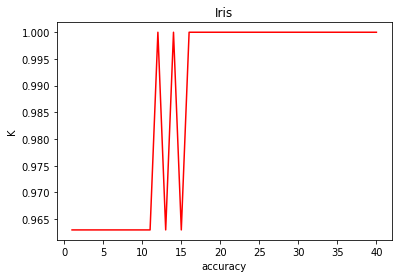

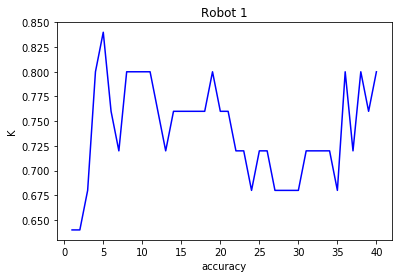

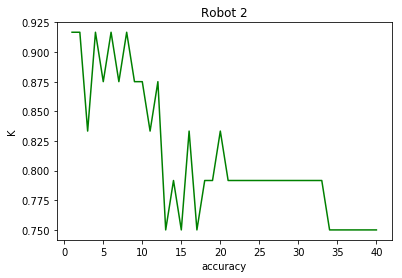

Manhattan distance


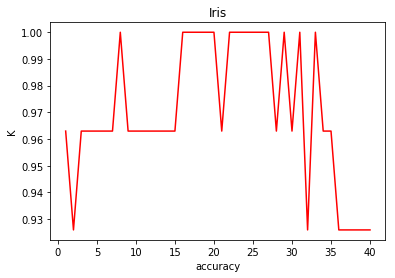

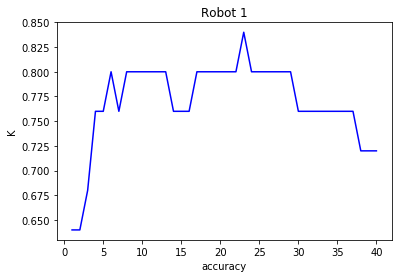

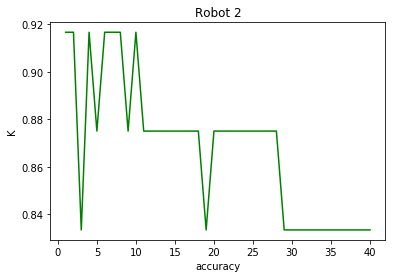

Minkowski distance


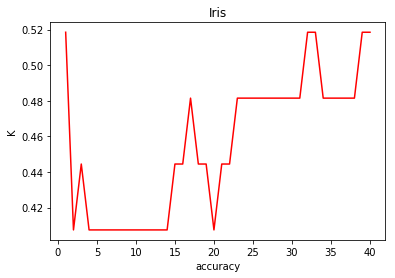

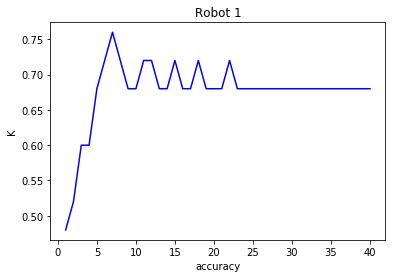

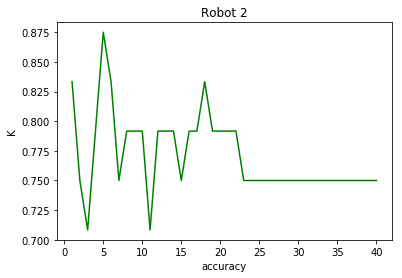

In [15]:
main()